In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib as mpl


In [8]:
tsnedir = "./tsne"
onlyfiles = [join(tsnedir, f) for f in listdir(tsnedir) if isfile(join(tsnedir, f))]
background_mp_id = pd.read_csv("./background_mp_ids.csv").mp_id.to_frame()
target = pd.read_csv("./target_mp_ids.csv")


In [9]:
features={}
for file in onlyfiles:
    decriptor = file.split('/')[-1].split('_')[1]
    print(decriptor)
    allmp_feat   = np.load(file)

    feat_xy = pd.DataFrame(allmp_feat.tolist())
    feat_xy.columns =['x','y']
    feat_xy['mp_id'] = background_mp_id
    features[decriptor]=feat_xy

topo
fcod0
xrd
comp
ccod0
pwdm
gatgnn


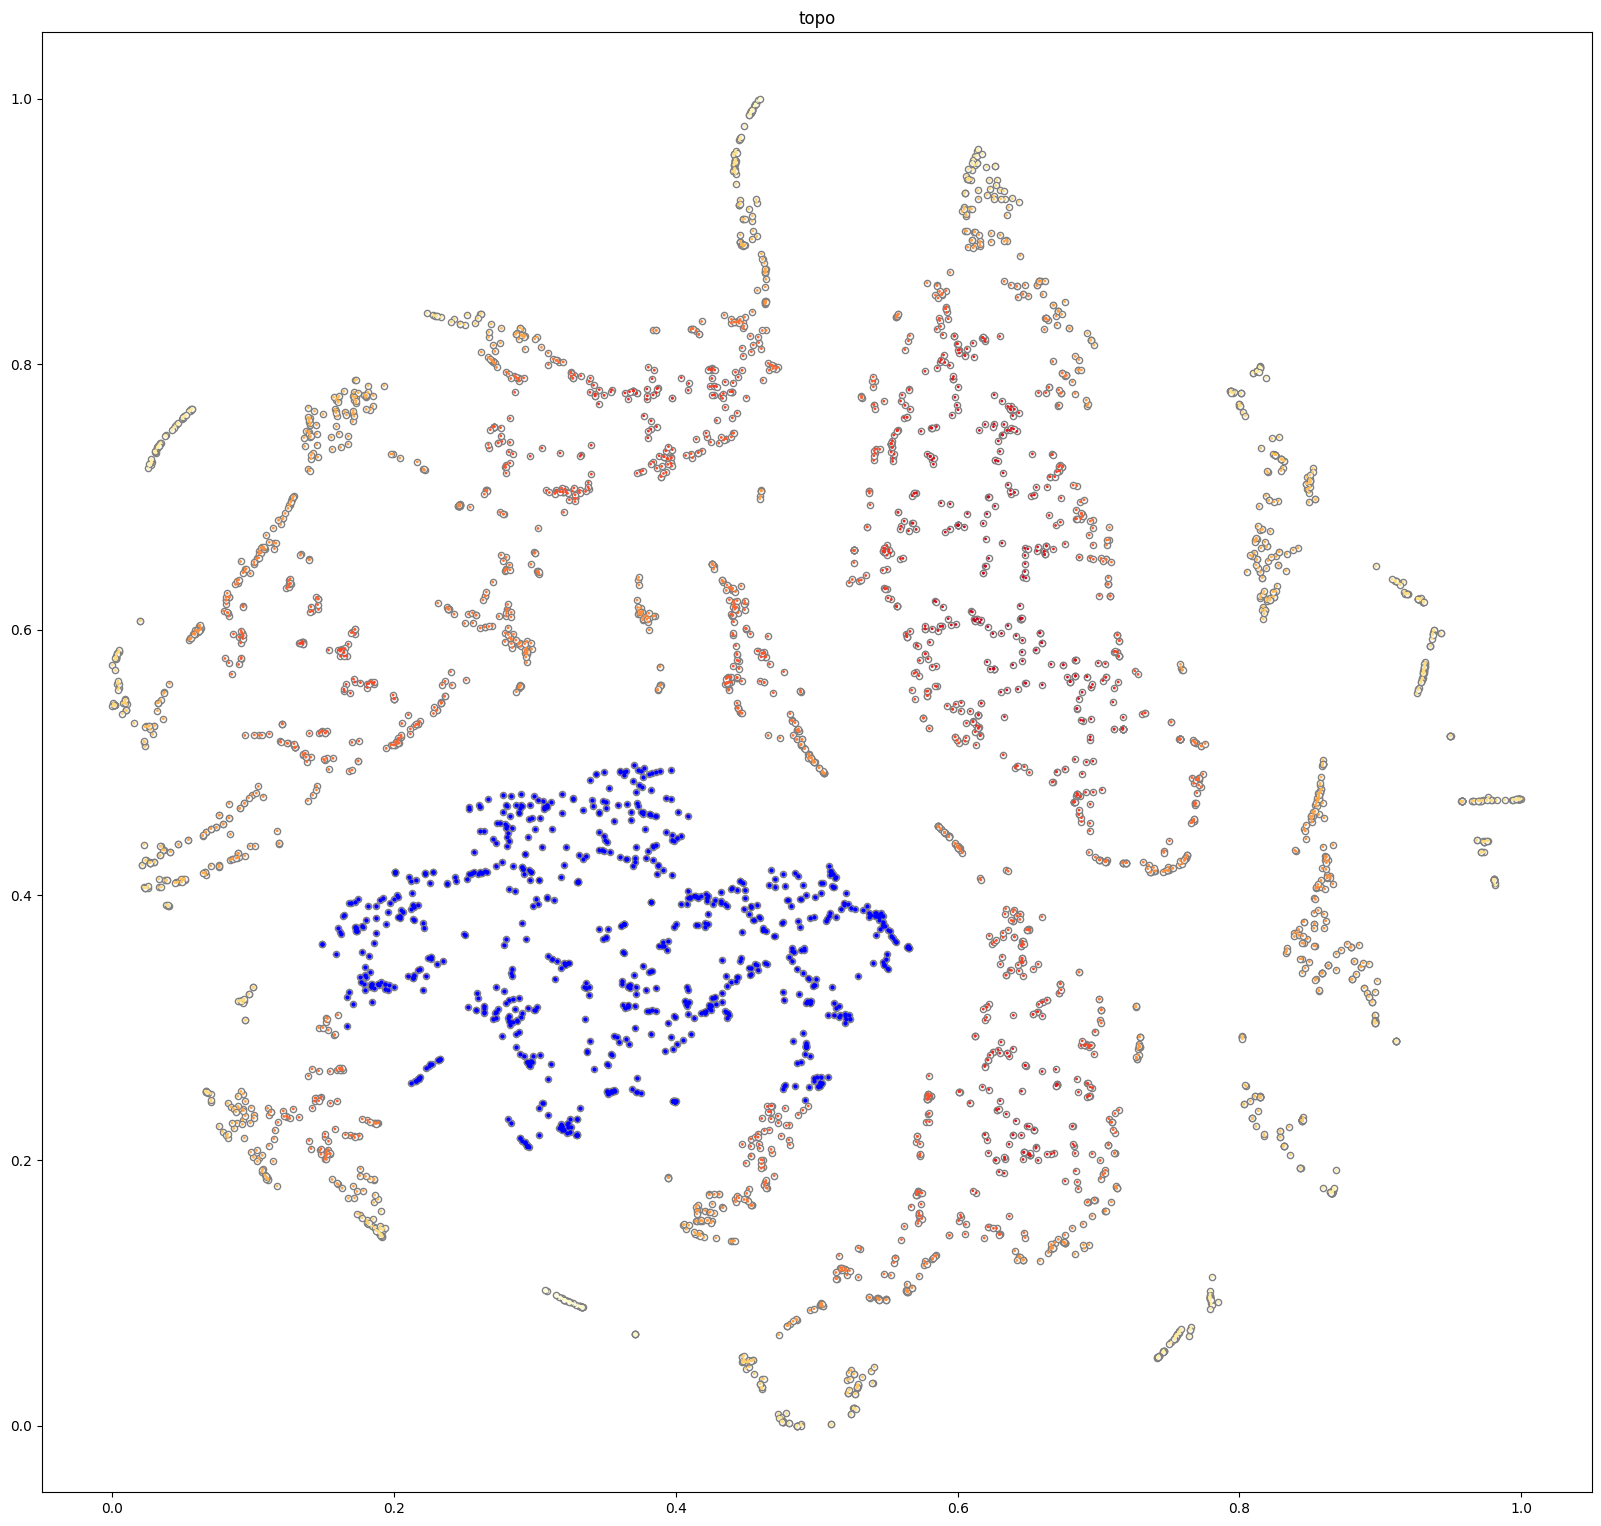

In [10]:
#each graph can take up to 5 mins
for decriptor in features:
    feat_xy = features[decriptor]
    fig = plt.figure(figsize=(20,20),dpi=100)
    ax1 = fig.add_subplot(111)

    x=feat_xy.loc[:]['x']
    y=feat_xy.loc[:]['y']
    plt.scatter(x,y,marker='o',color='white',s=20,zorder=1, edgecolor="grey")  

    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, s=1,zorder=3,cmap=mpl.colormaps['YlOrRd'])


    target_xy= pd.merge(right=target, 
                left=feat_xy, 
                how='right', 
                right_on='mp_id', 
                left_on='mp_id')


    x=target_xy.loc[:]['x']
    y=target_xy.loc[:]['y']
    plt.scatter(x,y,marker='.',color='blue',s=20,zorder=4) 
    plt.title(decriptor)
    plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None,
                    wspace=0.1, hspace=0.15)
    plt.xticks()
    plt.show()
    break
#remove break to get all graphs

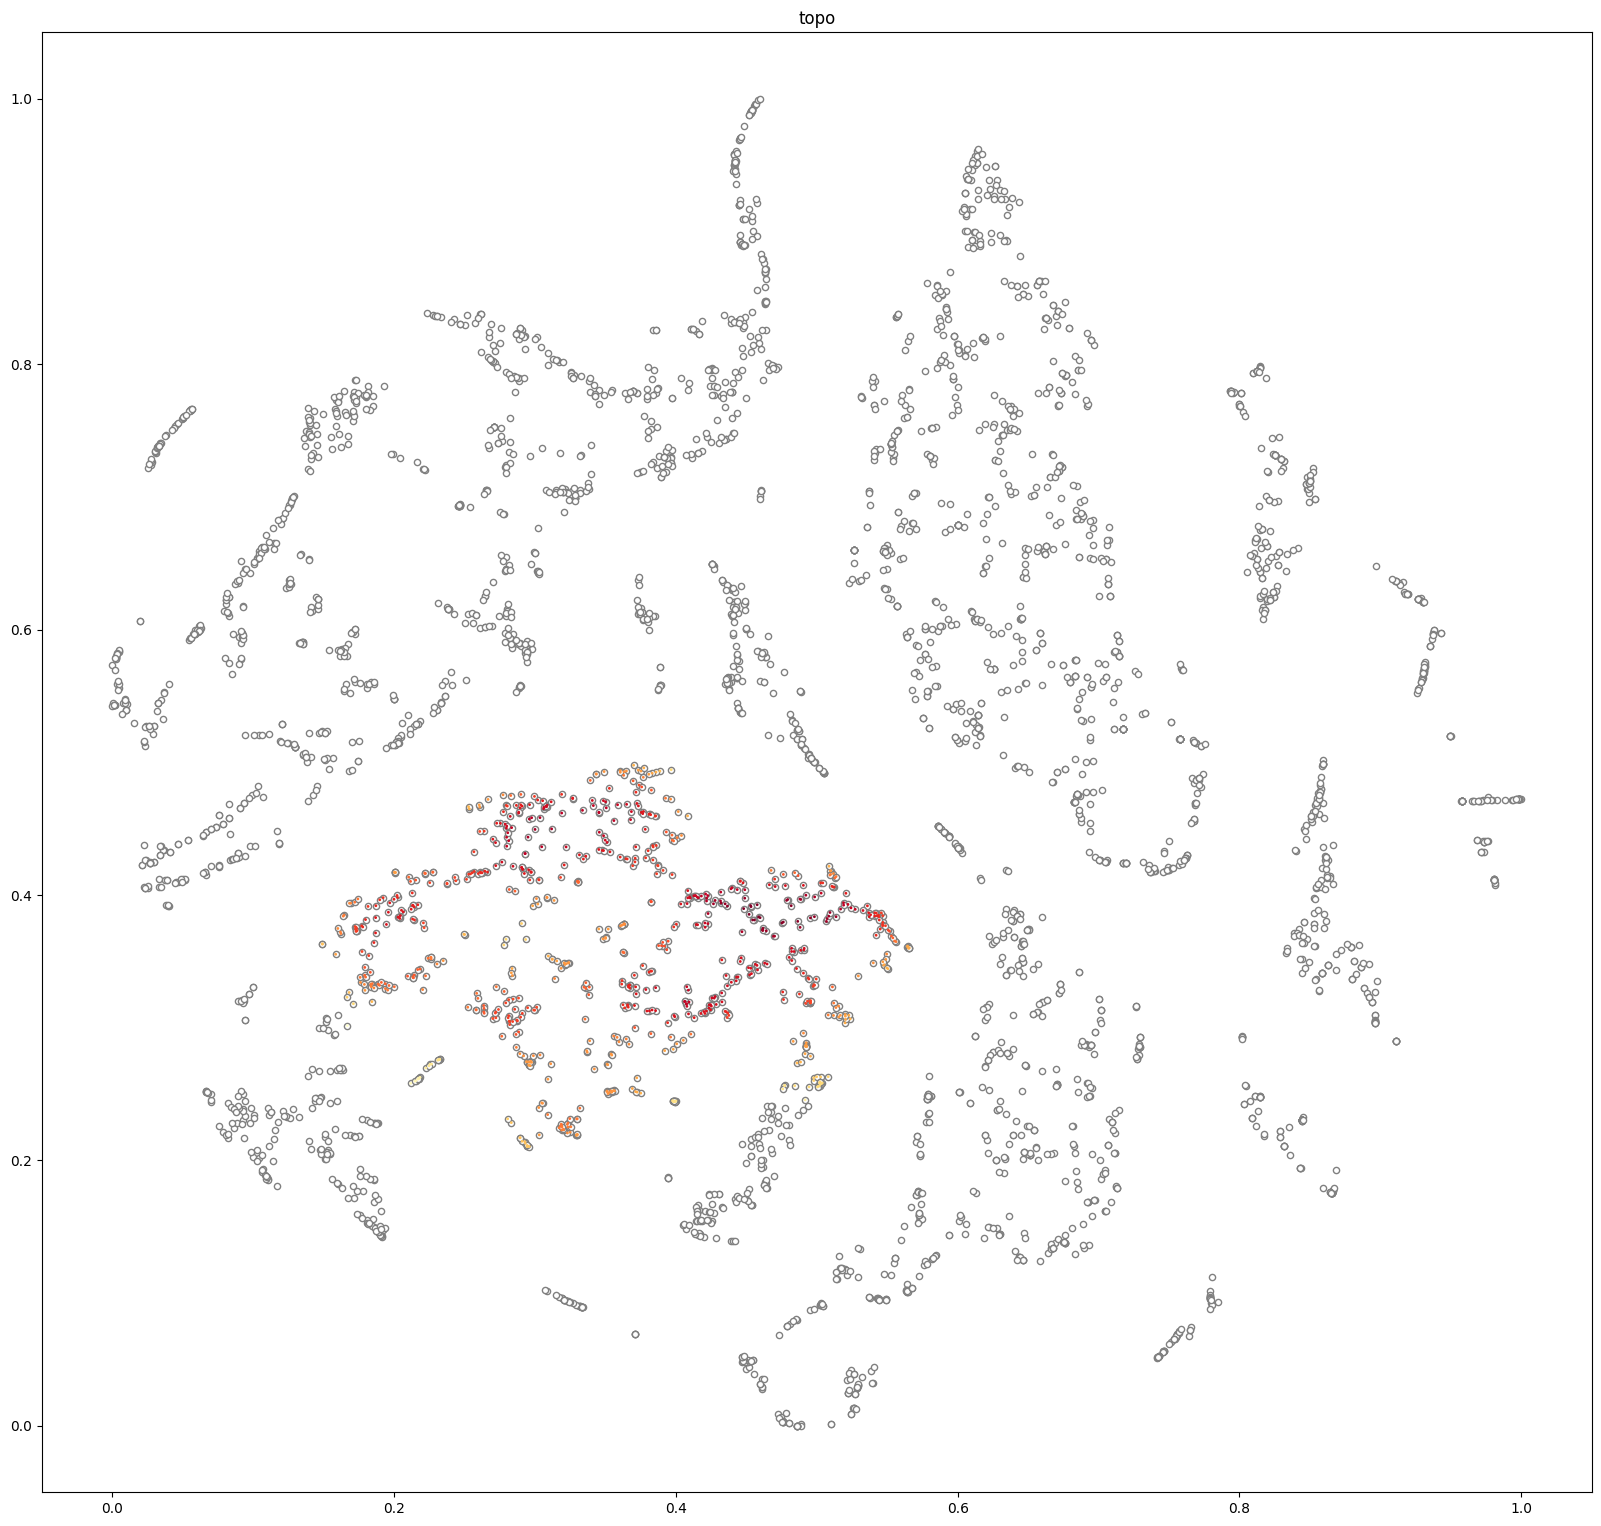

In [11]:
#each graph can take up to 5 mins
for decriptor in features:
    feat_xy = features[decriptor]
    fig = plt.figure(figsize=(20,20),dpi=100)
    ax1 = fig.add_subplot(111)

    x=feat_xy.loc[:]['x']
    y=feat_xy.loc[:]['y']
    plt.scatter(x,y,marker='o',color='white',s=20,zorder=1, edgecolor="grey")  


    target_xy= pd.merge(right=target, 
                left=feat_xy, 
                how='right', 
                right_on='mp_id', 
                left_on='mp_id')


    x=target_xy.loc[:]['x']
    y=target_xy.loc[:]['y']
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    plt.scatter(x, y, c=z, s=1,zorder=4,cmap=mpl.colormaps['YlOrRd'])

    plt.title(decriptor)
    plt.subplots_adjust(left=None, bottom=0.15, right=None, top=None,
                    wspace=0.1, hspace=0.15)
    plt.xticks()
    plt.show()
    break
#remove break to get all graphs

